In [1]:
# importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing dataset
from sklearn.datasets import load_boston
df=load_boston()

In [8]:
df1=pd.DataFrame(df.data)

In [9]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
df1.columns=df.feature_names

In [12]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
#splitting into independent and depedebnt dataset
y=df.target
x=df1

In [17]:
#spliting dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y  , test_size = 1/3, random_state = 0)

In [19]:
#standarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)

In [21]:
# creating model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x_train,y_train, scoring="neg_mean_squared_error",cv=10)

In [23]:
score

array([-22.45182618, -12.30888927, -35.62432088, -16.91274609,
       -22.61586934, -16.64899475, -54.48153528, -14.4295308 ,
       -23.4707848 , -12.07461582])

In [24]:
np.mean(score)

-23.101911322460275

In [25]:
y_pred=regressor.predict(x_test)

In [26]:
y_pred

array([25.04957382, 24.01944098, 29.28696976, 12.02444008, 21.22276537,
       19.127793  , 20.70097576, 21.12458962, 19.31534804, 20.53756504,
        5.77617201, 17.0201836 , 17.00551618,  5.32772005, 40.26831053,
       32.48720037, 22.55491255, 36.73522746, 31.28172539, 23.26536587,
       24.7003722 , 24.60601333, 20.61210579, 30.67245207, 22.35498131,
       10.93991932, 17.21696979, 18.19927949, 35.54491978, 20.71944112,
       18.20622681, 17.62888258, 19.0903763 , 23.58709825, 29.14001321,
       19.47806532, 10.8569891 , 25.17745915, 18.22279109, 15.41751357,
       26.21222019, 20.70306162, 22.20400443, 15.57251654, 22.48916067,
       24.76706535, 19.49087514, 22.88678576,  9.45649655, 24.28291309,
       21.50434173, 17.52886484, 24.47744414, 29.47675364, 13.3593672 ,
       21.42046633, 20.5158417 , 14.71491024, 15.05935713, 21.90510052,
       16.94118143, 21.40256808, 33.13663616, 31.64643742, 17.90013591,
       33.17280947, 18.50631786, 18.74101956, 19.41085274, 23.09

In [27]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [28]:
score


0.5555363370788116

<AxesSubplot:ylabel='Density'>

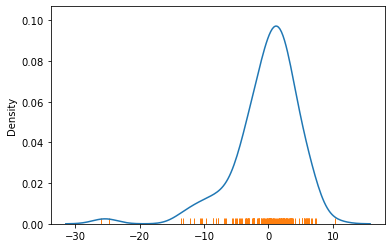

In [29]:
sns.kdeplot(y_pred-y_test)
sns.rugplot(y_pred-y_test)

In [31]:
# Ridge Regression
from sklearn.linear_model import  Ridge
from sklearn.model_selection import GridSearchCV

In [32]:
# hyperparameter tuning and cross validation
ridge_regressor=Ridge()
parameters={'alpha':[1,2,3,4,5,6,7,10,20,30,40,50,60]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=10)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50,
                                   60]},
             scoring='neg_mean_squared_error')

In [35]:
print(ridgecv.best_score_)

-23.078240519821637


In [37]:
print(ridgecv.best_params_)

{'alpha': 4}


In [39]:
ridge_pred=ridgecv.predict(x_test)

<AxesSubplot:ylabel='Density'>

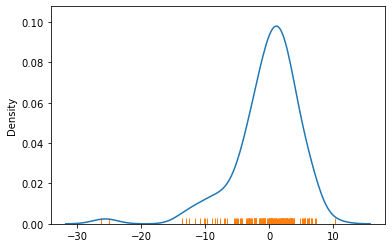

In [40]:
sns.kdeplot(ridge_pred-y_test)
sns.rugplot(ridge_pred-y_test)

In [41]:
from sklearn.metrics import r2_score
score=r2_score(ridge_pred,y_test)

In [42]:
score

0.5487872042389818